# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units="metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =(f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =  city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country =  city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        
      
        
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tralee
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | tera
Processing Record 5 of Set 1 | east ballina
Processing Record 6 of Set 1 | petropavlovsk-kamchatsky
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | coahuayana de hidalgo
Processing Record 9 of Set 1 | vreden
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | aleksandrovsk-sakhalinskiy
Processing Record 13 of Set 1 | crane
Processing Record 14 of Set 1 | shakiso
Processing Record 15 of Set 1 | wajir
Processing Record 16 of Set 1 | espargos
City not found. Skipping...
Processing Record 17 of Set 1 | limoeiro do norte
Processing Record 18 of Set 1 | alice springs
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1

City not found. Skipping...
Processing Record 36 of Set 4 | sao gabriel da cachoeira
Processing Record 37 of Set 4 | westport
Processing Record 38 of Set 4 | marathon
Processing Record 39 of Set 4 | keflavik
Processing Record 40 of Set 4 | yuzhno-kurilsk
Processing Record 41 of Set 4 | fale old settlement
Processing Record 42 of Set 4 | weno
Processing Record 43 of Set 4 | altay
Processing Record 44 of Set 4 | priozersk
Processing Record 45 of Set 4 | codrington
Processing Record 46 of Set 4 | port alfred
Processing Record 47 of Set 4 | viveiro
Processing Record 48 of Set 4 | mabaruma
Processing Record 49 of Set 4 | junin de los andes
Processing Record 0 of Set 5 | argo
Processing Record 1 of Set 5 | itamaraca
Processing Record 2 of Set 5 | waingapu
Processing Record 3 of Set 5 | agat village
Processing Record 4 of Set 5 | aasiaat
Processing Record 5 of Set 5 | tonnay-charente
Processing Record 6 of Set 5 | geraldton
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 

Processing Record 22 of Set 8 | whitehorse
Processing Record 23 of Set 8 | la passe
Processing Record 24 of Set 8 | bouar
Processing Record 25 of Set 8 | usogorsk
Processing Record 26 of Set 8 | ahfir
Processing Record 27 of Set 8 | chernyshevsk
Processing Record 28 of Set 8 | grand-bassam
Processing Record 29 of Set 8 | kourou
Processing Record 30 of Set 8 | saudarkrokur
Processing Record 31 of Set 8 | north bend
Processing Record 32 of Set 8 | patong
Processing Record 33 of Set 8 | badger
Processing Record 34 of Set 8 | high rock
Processing Record 35 of Set 8 | am djarass
City not found. Skipping...
Processing Record 36 of Set 8 | tonghae
Processing Record 37 of Set 8 | salalah
Processing Record 38 of Set 8 | hazard
Processing Record 39 of Set 8 | ponta delgada
Processing Record 40 of Set 8 | tateyama
Processing Record 41 of Set 8 | berberati
Processing Record 42 of Set 8 | puerto princesa
Processing Record 43 of Set 8 | tadine
Processing Record 44 of Set 8 | olinda
Processing Record

Processing Record 12 of Set 12 | tongchuan
Processing Record 13 of Set 12 | kapuskasing
Processing Record 14 of Set 12 | phan rang-thap cham
Processing Record 15 of Set 12 | bardai
Processing Record 16 of Set 12 | berdigestyakh
Processing Record 17 of Set 12 | stuttgart
Processing Record 18 of Set 12 | cao bang
Processing Record 19 of Set 12 | cromer
Processing Record 20 of Set 12 | isiro
Processing Record 21 of Set 12 | wellington
Processing Record 22 of Set 12 | korla
Processing Record 23 of Set 12 | kavieng
Processing Record 24 of Set 12 | iskateley
Processing Record 25 of Set 12 | kerikeri
Processing Record 26 of Set 12 | puerto aysen
Processing Record 27 of Set 12 | hirara
Processing Record 28 of Set 12 | kampong chhnang
Processing Record 29 of Set 12 | sola
Processing Record 30 of Set 12 | haiku-pauwela
Processing Record 31 of Set 12 | kavaratti
Processing Record 32 of Set 12 | chhuikhadan
Processing Record 33 of Set 12 | usinsk
Processing Record 34 of Set 12 | lubao
Processing R

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tralee,52.2704,-9.7026,9.14,100,40,2.06,IE,1700992017
1,port-aux-francais,-49.3500,70.2167,4.10,69,42,10.56,TF,1700992329
2,edinburgh of the seven seas,-37.0676,-12.3116,14.29,79,76,12.27,SH,1700992158
3,tera,14.0078,0.7531,31.65,10,52,4.00,NE,1700992332
4,east ballina,-28.8667,153.5833,20.78,90,95,4.34,AU,1700992334


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv",index=False, header=True)

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv",encoding="ISO-8859-1")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tralee,52.2704,-9.7026,9.14,100,40,2.06,IE,1700992017
1,port-aux-francais,-49.3500,70.2167,4.10,69,42,10.56,TF,1700992329
2,edinburgh of the seven seas,-37.0676,-12.3116,14.29,79,76,12.27,SH,1700992158
3,tera,14.0078,0.7531,31.65,10,52,4.00,NE,1700992332
4,east ballina,-28.8667,153.5833,20.78,90,95,4.34,AU,1700992334


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

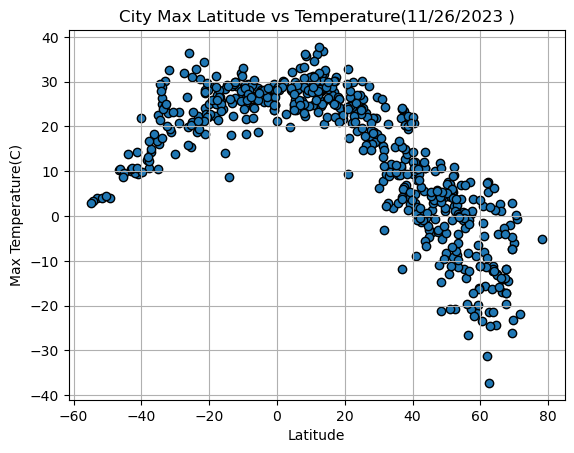

In [30]:
# Build scatter plot for latitude vs. temperature

now=pd.to_datetime("today").strftime("%m/%d/%Y")

plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o",edgecolor = "black")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title(f"City Max Latitude vs Temperature({now} )")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

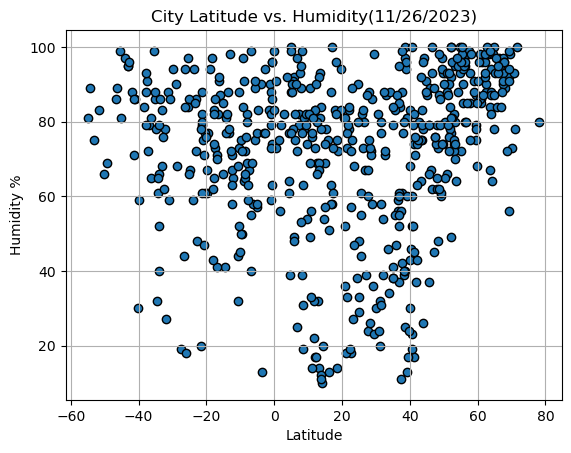

In [31]:
# Build the scatter plots for latitude vs. humidity



plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor = "black")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude vs. Humidity({now})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

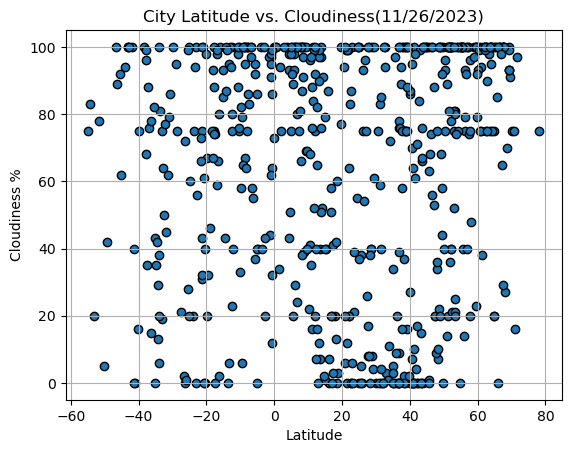

In [32]:
# Build the scatter plots for latitude vs. cloudiness



plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor = "black")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title(f"City Latitude vs. Cloudiness({now})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

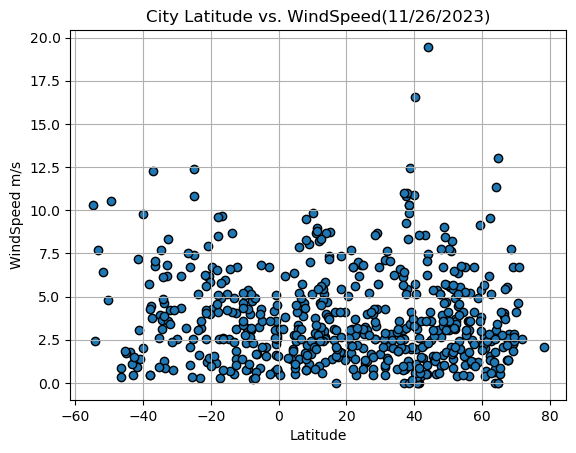

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor = "black")
plt.grid()

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("WindSpeed m/s")
plt.title(f"City Latitude vs. WindSpeed({now})")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, x_label, y_label):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression = x_values * slope + intercept
    lineeq = f"y={round(slope,2)}x +{round(intercept,2)}"
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regression)
    plt.annotate(lineeq,(15,50),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hem_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tralee,52.2704,-9.7026,9.14,100,40,2.06,IE,1700992017
3,tera,14.0078,0.7531,31.65,10,52,4.00,NE,1700992332
5,petropavlovsk-kamchatsky,53.0452,158.6483,-8.64,74,75,4.47,RU,1700992336
6,coahuayana de hidalgo,18.7000,-103.6583,22.11,72,3,1.73,MX,1700992339
7,vreden,52.0379,6.8280,5.42,92,100,3.71,DE,1700992341


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hem_df =city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,port-aux-francais,-49.3500,70.2167,4.10,69,42,10.56,TF,1700992329
2,edinburgh of the seven seas,-37.0676,-12.3116,14.29,79,76,12.27,SH,1700992158
4,east ballina,-28.8667,153.5833,20.78,90,95,4.34,AU,1700992334
8,punta arenas,-53.1500,-70.9167,4.06,75,20,7.72,CL,1700992264
9,west island,-12.1568,96.8225,28.99,65,40,6.69,CC,1700992344


###  Temperature vs. Latitude Linear Regression Plot

The r value is 0.7747373489813767


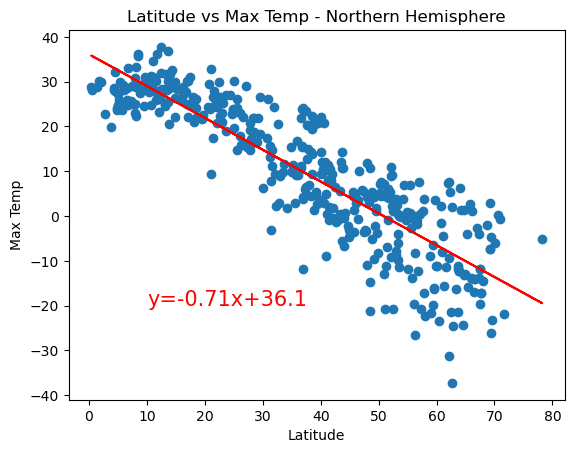

In [37]:
# Linear regression on Northern Hemisphere

(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hem_df["Lat"],northern_hem_df["Max Temp"])

regression= northern_hem_df["Lat"]*slope+intercept
lineeq=f"y={round(slope,2)}x+{round(intercept,2)}"
plt.scatter(northern_hem_df["Lat"],northern_hem_df["Max Temp"],)
plt.plot(northern_hem_df["Lat"],regression,color="red")
plt.annotate(lineeq,(10,-20),c="red",fontsize=15)
plt.title("Latitude vs Max Temp - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r value is {rvalue**2}")
plt.show()




The r value is 0.4844448509714239


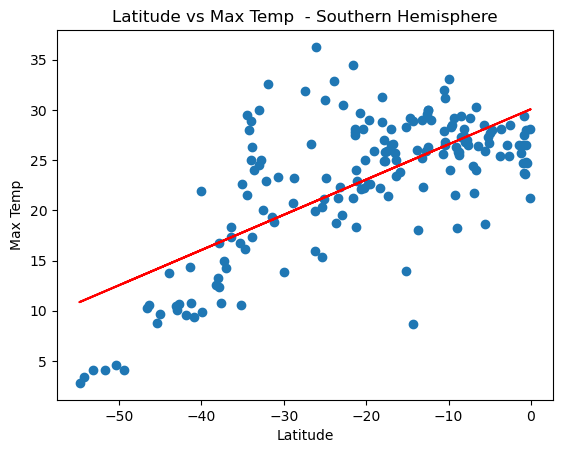

In [38]:
# Linear regression on Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hem_df["Lat"],southern_hem_df["Max Temp"])
regression= southern_hem_df["Lat"]*slope+intercept
lineeq=f"y={round(slope,2)}x+{round(intercept,2)}"
plt.scatter(southern_hem_df["Lat"],southern_hem_df["Max Temp"])
plt.plot(southern_hem_df["Lat"],regression,color="red")
plt.annotate(lineeq,(-55,90),c="red",fontsize=15)
plt.title("Latitude vs Max Temp  - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r value is {rvalue**2}")
plt.show()





**Discussion about the linear relationship:** 
Northern Hemisphere:Temprature and latitude are negatively correlated.Temprature decreases with increase in latitude.Both the factors are strongly dependent.


Southern Hemisphere:Temprature and latitude are Positively correlated.Temprature Increases with increase in latitude.Both the factors are strongly dependent.

### Humidity vs. Latitude Linear Regression Plot

 The r value is 0.12718531077831366


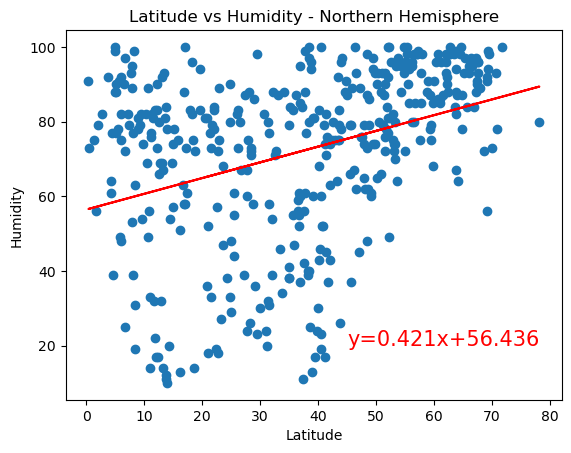

In [39]:
# Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hem_df["Lat"],northern_hem_df["Humidity"])

regression= northern_hem_df["Lat"]*slope+intercept
plt.scatter(northern_hem_df["Lat"],northern_hem_df["Humidity"])
plt.plot(northern_hem_df["Lat"],regression, c="red")
plt.annotate(f"y={round(slope,3)}x+{round(intercept,3)}",(45,20),c="red",fontsize=15)
plt.title("Latitude vs Humidity - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print (f" The r value is {rvalue**2}")
plt.show()


 The r value is 0.007354157308638142


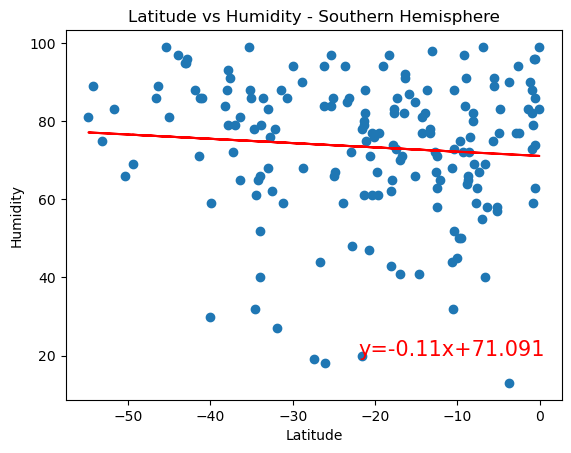

In [40]:
# Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hem_df["Lat"],southern_hem_df["Humidity"])

regression= southern_hem_df["Lat"]*slope+intercept
plt.scatter(southern_hem_df["Lat"],southern_hem_df["Humidity"])
plt.plot(southern_hem_df["Lat"],regression, c="red")
plt.annotate(f"y={round(slope,3)}x+{round(intercept,3)}",(-22,20),c="red",fontsize=15)
plt.title("Latitude vs Humidity - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print (f" The r value is {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** 

Northern Hemisphere:There is no or weak correlation between latitude and humidity


Southern Hemisphere:There is no or weak correlation between latitude and humidity

### Cloudiness vs. Latitude Linear Regression Plot

 The r value is 0.021417854666753378


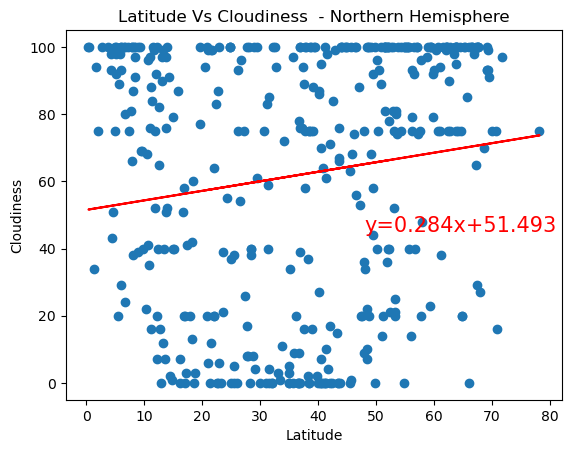

In [41]:
# Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hem_df["Lat"],northern_hem_df["Cloudiness"])

regression= northern_hem_df["Lat"]*slope+intercept
plt.scatter(northern_hem_df["Lat"],northern_hem_df["Cloudiness"])
plt.plot(northern_hem_df["Lat"],regression, c="red")
plt.annotate(f"y={round(slope,3)}x+{round(intercept,3)}",(48,45),c="red",fontsize=15)
plt.title("Latitude Vs Cloudiness  - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print (f" The r value is {rvalue**2}")
plt.show()


 The r value is 0.02496323729291743


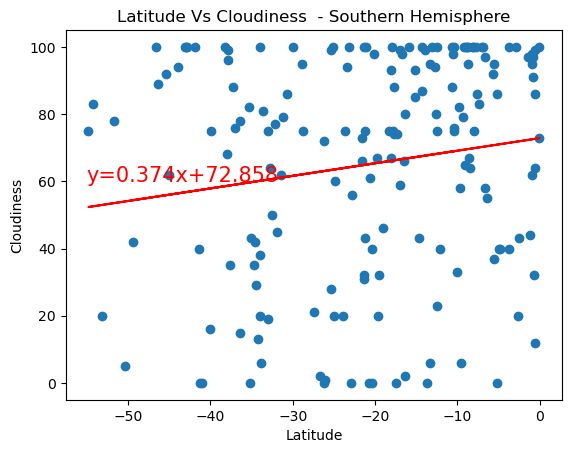

In [42]:
# Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hem_df["Lat"],southern_hem_df["Cloudiness"])


regression= southern_hem_df["Lat"]*slope+intercept
plt.scatter(southern_hem_df["Lat"],southern_hem_df["Cloudiness"])
plt.plot(southern_hem_df["Lat"],regression, c="red")
plt.annotate(f"y={round(slope,3)}x+{round(intercept,3)}",(-55,60),c="red",fontsize=15)
plt.title("Latitude Vs Cloudiness  - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print (f" The r value is {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** 

Northern Hemisphere:There is no  or very weak correlation between Latitude and Cloudiness

Southern Hemisphere:There is no  or very weak correlation between Latitude and Cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r value is 0.0011917107973683793


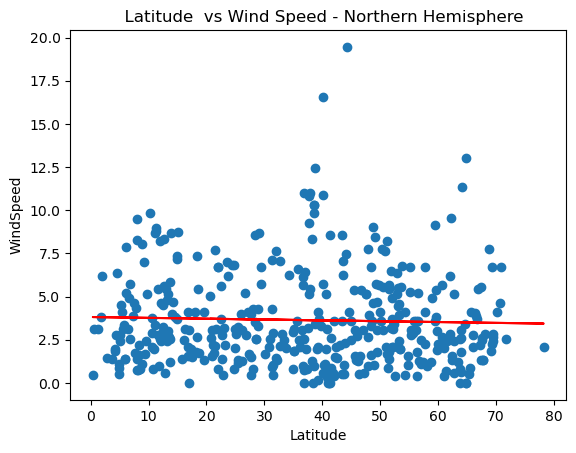

In [43]:
# Northern Hemisphere

(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hem_df["Lat"],northern_hem_df["Wind Speed"])
regression= northern_hem_df["Lat"]*slope+intercept

plt.scatter(northern_hem_df["Lat"],northern_hem_df["Wind Speed"])
plt.plot(northern_hem_df["Lat"],regression, c="red")
plt.annotate(f"y={round(slope,2)}x+{round(intercept,2)}",(20,35),c="red",fontsize=15)
plt.title("  Latitude  vs Wind Speed - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed")
print(f"The r value is {rvalue**2}")
plt.show()


The r value is 0.036770762912259114


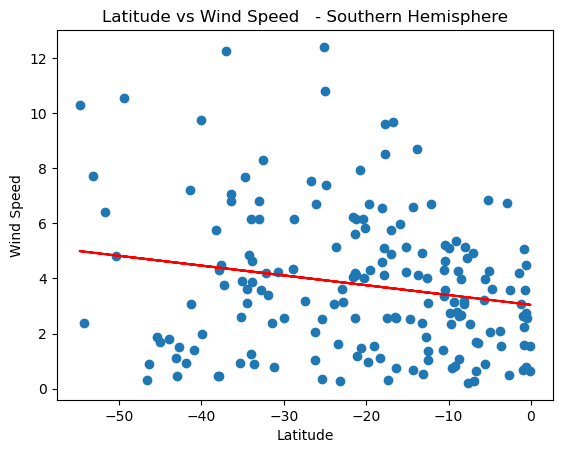

In [44]:
# Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hem_df["Lat"],southern_hem_df["Wind Speed"])
regression= southern_hem_df["Lat"]*slope+intercept

plt.scatter(southern_hem_df["Lat"],southern_hem_df["Wind Speed"],)

plt.plot(southern_hem_df["Lat"],regression, c="red")
plt.annotate(f"y={round(slope,2)}x+{round(intercept,2)}",(-20,28),c="red",fontsize=15)
plt.xlabel( "Latitude" )
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed   - Southern Hemisphere")
print(f"The r value is {rvalue**2}")
plt.show()


**Discussion about the linear relationship:**

Northern Hemisphere:There is no  or very weak correlation between Latitude and WindSpeed

Southern Hemisphere:There is no  or very weak correlation between Latitude and WindSpeed